In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

from hypers import weight_hypers
from hypers import alpha_hypers

In [3]:
series_type = "default"
from_start = False
a, b = -40, 40
train_window = 10

synt = Synthesizer(series_type, dim=10, low=-10, high=10, clip=(a, b),
                   noise_var=1, workers_num=3, random_seed=313)
gen = Generator(series_type, synt)
gen.generate(length=1500, from_start=from_start, lower_bound=100, upper_bound=400, alternating=True)

In [4]:
interesting_w = ["default", "simple_105", "simple_11", "simple_12", "simple_2"]
algos_w = []
for key in interesting_w:
    w_hyper = weight_hypers[key]
    algo = Algorithm(series_type, gen, train_window=train_window, a=a, b=b,
                     weights_func=w_hyper.func, weight_const=w_hyper.const,
                     init_pretrained=False)
    gen.launch()
    algo.run()
    algo.post_calculations(from_start=from_start)
    algos_w.append(algo)

100%|████████████████████████████████████████████████████████████████████████| 1878/1878 [00:47<00:00, 39.73it/s]


In [5]:
interesting_a = ["default", "simple_11", "simple_13", "simple_15", "simple_2"]
best = weight_hypers["simple_11"]
algos_a = []
for key in interesting_a:
    a_hyper = alpha_hypers[key]
    algo = Algorithm(series_type, gen, train_window=train_window, a=a, b=b,
                     weights_func=best.func, weight_const=best.const,
                     alpha_func=a_hyper.func,
                     init_pretrained=False)
    gen.launch()
    algo.run()
    algo.post_calculations(from_start=from_start)
    algos_a.append(algo)

100%|████████████████████████████████████████████████████████████████████████| 1878/1878 [00:44<00:00, 41.79it/s]


In [6]:
dict_w = {}

for key, algo in zip(interesting_w, algos_w):
    w_hyper = weight_hypers[key]
    dict_w[key] = [w_hyper.repr, algo.regret]
    # print(key.ljust(12), w_hyper.repr.ljust(45), f"regret: {algo.regret}")
df_w =pd.DataFrame(dict_w).transpose().rename(columns={0 : "weights_function", 1: "regret"})
df_w

,weights_function,regret
default,1 / ((x + 1) * (ln(x + 1))^2),103641.558142
simple_105,1 / (x^1.05),77889.206744
simple_11,1 / (x^1.1),79361.5415
simple_12,1 / (x^1.2),82192.515979
simple_2,1 / (x^2),96809.947691


In [7]:
dict_a = {}

for key, algo in zip(interesting_a, algos_a):
    a_hyper = alpha_hypers[key]
    dict_a[key] = [a_hyper.repr, algo.regret]
    
df_a = pd.DataFrame(dict_a).transpose().rename(columns={0 : "alpha_function", 1: "regret"})

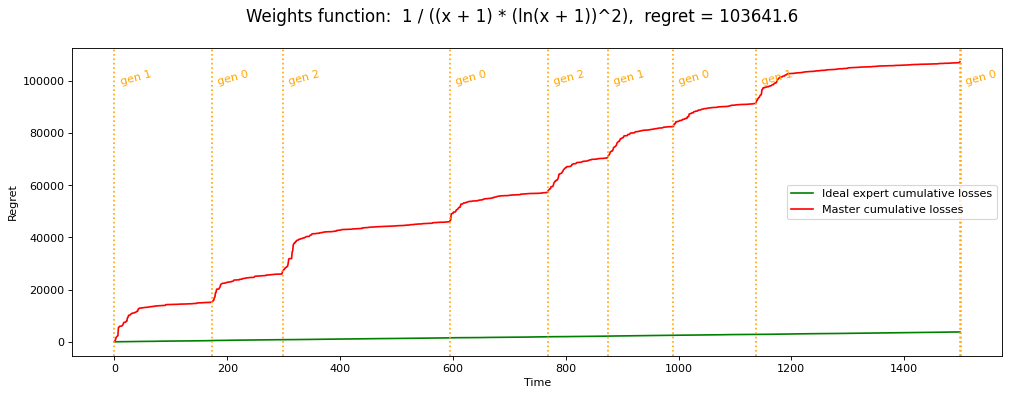

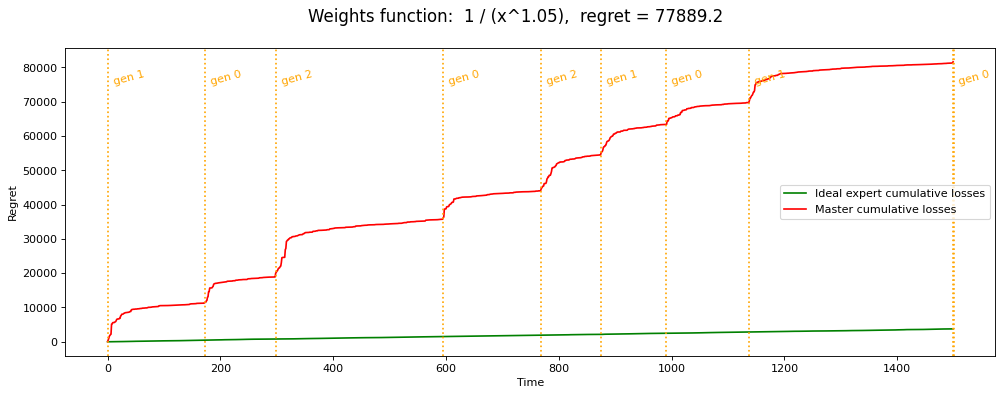

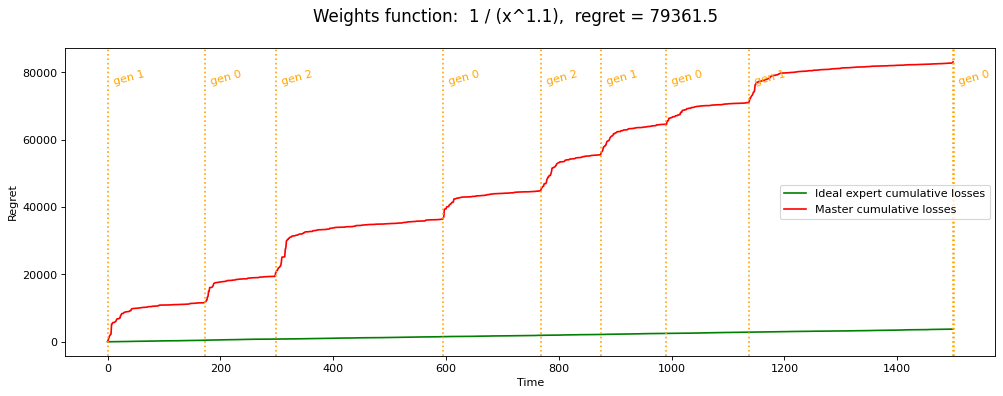

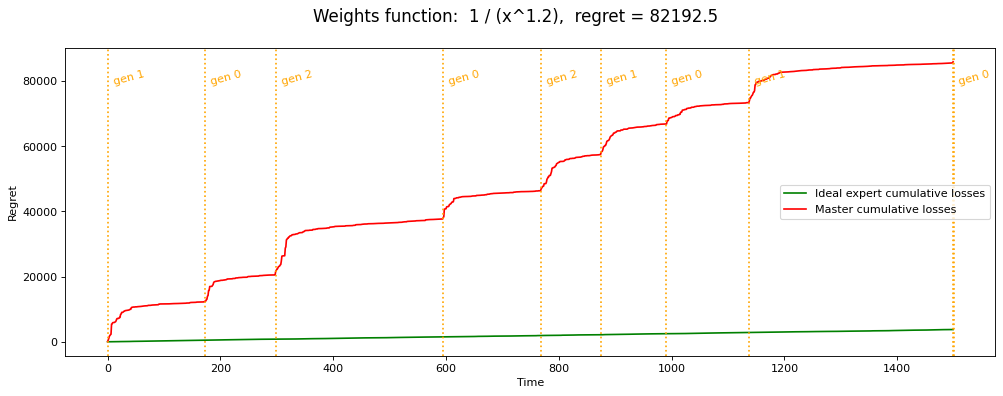

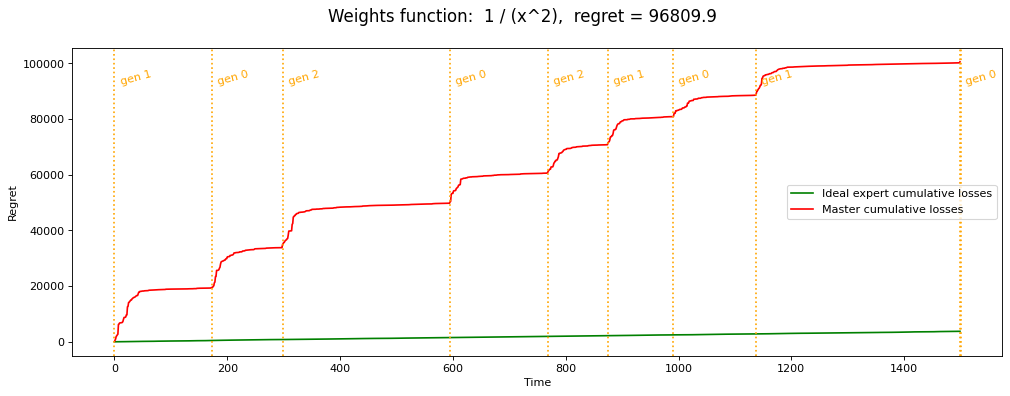

In [8]:
for algo, repr, regret in zip(algos_w, df_w.weights_function, df_w.regret):
    algo.draw_all(show=["master", "ideal"], show_experts=[], show_axes=["regret"], height_ratios=[1], 
                  suptitle=f"Weights function:  {repr},  regret = {regret:.1f}", fig_size=(15, 5))

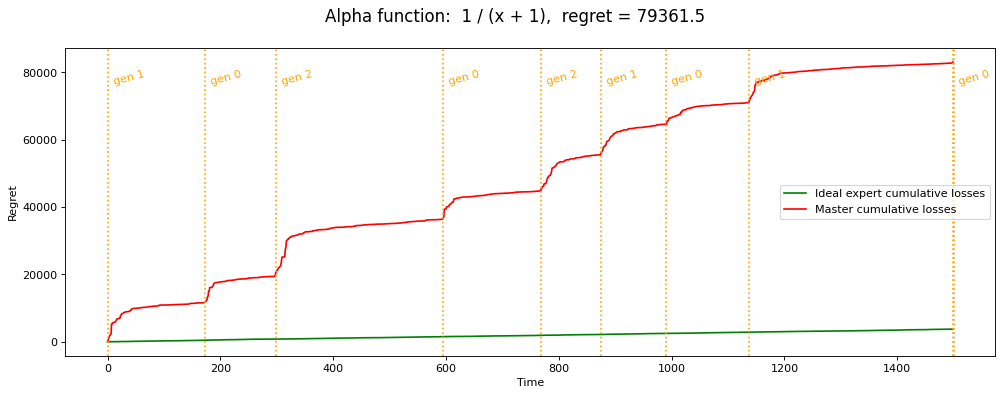

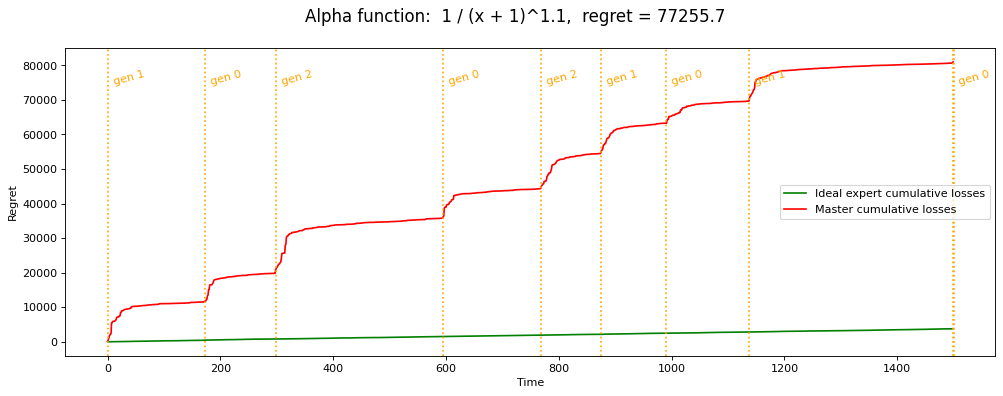

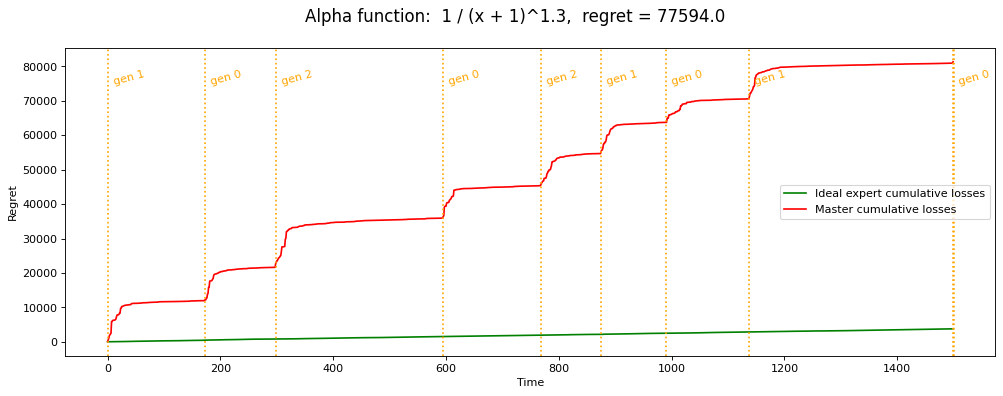

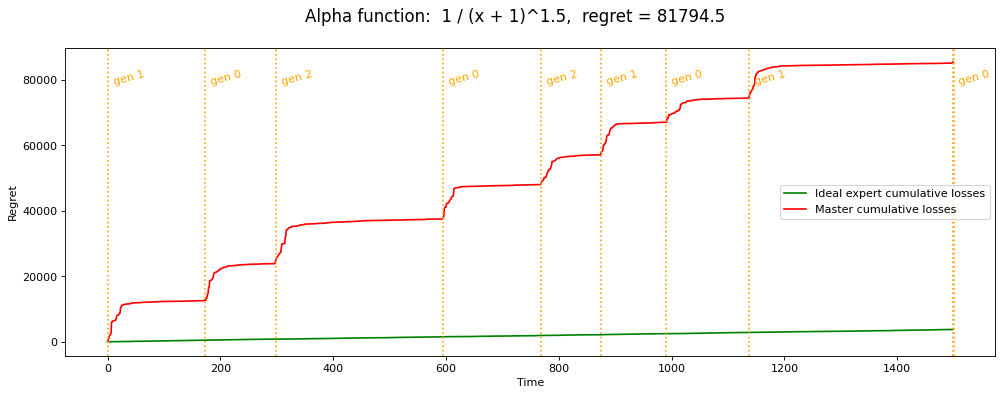

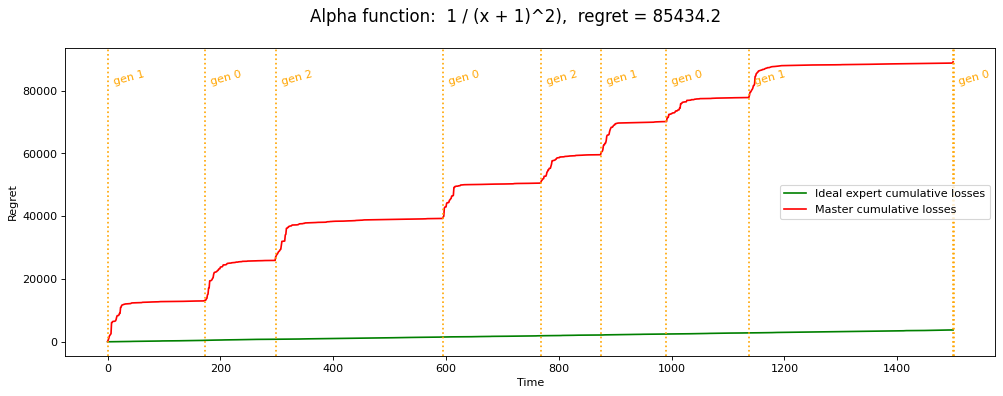

In [9]:
for algo, repr, regret in zip(algos_a, df_a.alpha_function, df_a.regret):
    algo.draw_all(show=["master", "ideal"], show_experts=[], show_axes=["regret"], height_ratios=[1], 
                  suptitle=f"Alpha function:  {repr},  regret = {regret:.1f}", fig_size=(15, 5))